<a href="https://colab.research.google.com/github/mariac-analytics/Portfolio/blob/main/GoogleAdsAnalysis/Google_Ads_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv('GoogleAds_DataAnalytics_Sales_Uncleaned.csv')

df.head()

Saving GoogleAds_DataAnalytics_Sales_Uncleaned.csv to GoogleAds_DataAnalytics_Sales_Uncleaned.csv


,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword
0,A1000,DataAnalyticsCourse,104.0,4498.0,$231.88,14.0,7.0,0.058,$1892,2024-11-16,hyderabad,desktop,learn data analytics
1,A1001,DataAnalyticsCourse,173.0,5107.0,$216.84,10.0,8.0,0.046,$1679,20-11-2024,hyderabad,mobile,data analytics course
2,A1002,Data Anlytics Corse,90.0,4544.0,$203.66,26.0,9.0,NaN,$1624,2024/11/16,hyderabad,Desktop,data analitics online
3,A1003,Data Analytcis Course,142.0,3185.0,$237.66,17.0,6.0,NaN,$1225,2024-11-26,HYDERABAD,tablet,data anaytics training
4,A1004,Data Analytics Corse,156.0,3361.0,$195.9,30.0,8.0,NaN,$1091,2024-11-22,hyderabad,desktop,online data analytic


In [3]:
df.isnull().sum()

,0
Ad_ID,0
Campaign_Name,0
Clicks,112
Impressions,54
Cost,97
Leads,48
Conversions,74
Conversion Rate,626
Sale_Amount,139
Ad_Date,0


In [4]:
df.describe()

,Clicks,Impressions,Leads,Conversions,Conversion Rate
count,2488.000000,2546.000000,2552.000000,2526.000000,1974.000000
mean,138.956994,4523.280833,20.003918,6.519002,0.048979
std,34.619376,869.927913,6.032317,2.272573,0.019987
min,80.000000,3000.000000,10.000000,3.000000,0.015000
25%,110.000000,3764.000000,15.000000,5.000000,0.035000
50%,139.000000,4518.500000,20.000000,7.000000,0.046000
75%,169.000000,5279.500000,25.000000,9.000000,0.058000
max,199.000000,5999.000000,30.000000,10.000000,0.123000


In [5]:
df['Campaign_Name'].unique()

array(['DataAnalyticsCourse', 'Data Anlytics Corse',
       'Data Analytcis Course', 'Data Analytics Corse'], dtype=object)

In [6]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows.head(10))

df = df.drop_duplicates().reset_index(drop=True)

print(f"Dataset shape after dropping duplicates: {df.shape}")

Number of duplicate rows: 0
Empty DataFrame
Columns: [Ad_ID, Campaign_Name, Clicks, Impressions, Cost, Leads, Conversions, Conversion Rate, Sale_Amount, Ad_Date, Location, Device, Keyword]
Index: []
Dataset shape after dropping duplicates: (2600, 13)


In [7]:
df['Location'].unique()

array(['hyderabad', 'HYDERABAD', 'Hyderbad', 'hydrebad'], dtype=object)

In [8]:
df['Ad_Date'].unique()

array(['2024-11-16', '20-11-2024', '2024/11/16', '2024-11-26',
       '2024-11-22', '16-11-2024', '06-11-2024', '2024/11/24',
       '2024/11/12', '14-11-2024', '2024/11/22', '2024/11/27',
       '12-11-2024', '2024-11-04', '2024-11-29', '2024-11-10',
       '2024/11/07', '2024-11-05', '2024/11/21', '2024/11/08',
       '2024-11-20', '30-11-2024', '2024-11-02', '2024-11-21',
       '2024-11-23', '2024/11/13', '2024-11-08', '22-11-2024',
       '2024/11/03', '2024-11-25', '01-11-2024', '2024-11-07',
       '09-11-2024', '2024-11-14', '2024/11/09', '29-11-2024',
       '15-11-2024', '11-11-2024', '2024-11-24', '21-11-2024',
       '2024/11/26', '26-11-2024', '18-11-2024', '2024-11-11',
       '23-11-2024', '2024/11/20', '27-11-2024', '04-11-2024',
       '2024/11/06', '2024-11-09', '2024/11/25', '17-11-2024',
       '2024/11/28', '2024-11-03', '2024-11-19', '2024/11/23',
       '03-11-2024', '2024/11/15', '2024-11-01', '2024-11-28',
       '2024-11-15', '2024/11/17', '2024-11-30', '24-11

In [9]:
import pandas as pd

df['Ad_Date_raw'] = df['Ad_Date']

mask = df['Ad_Date'].notna()
df.loc[mask, 'Ad_Date'] = pd.to_datetime(df.loc[mask, 'Ad_Date'], format='%Y-%m-%d', errors='coerce')

# DD-MM-YYYY
mask = df['Ad_Date'].isna() & df['Ad_Date_raw'].notna()
df.loc[mask, 'Ad_Date'] = pd.to_datetime(df.loc[mask, 'Ad_Date_raw'], format='%d-%m-%Y', errors='coerce')

# YYYY/MM/DD
mask = df['Ad_Date'].isna() & df['Ad_Date_raw'].notna()
df.loc[mask, 'Ad_Date'] = pd.to_datetime(df.loc[mask, 'Ad_Date_raw'], format='%Y/%m/%d', errors='coerce')

df = df.sort_values(by='Ad_Date').reset_index(drop=True)

df['Ad_Date'].unique()

array([Timestamp('2024-11-01 00:00:00'), Timestamp('2024-11-02 00:00:00'),
       Timestamp('2024-11-03 00:00:00'), Timestamp('2024-11-04 00:00:00'),
       Timestamp('2024-11-05 00:00:00'), Timestamp('2024-11-06 00:00:00'),
       Timestamp('2024-11-07 00:00:00'), Timestamp('2024-11-08 00:00:00'),
       Timestamp('2024-11-09 00:00:00'), Timestamp('2024-11-10 00:00:00'),
       Timestamp('2024-11-11 00:00:00'), Timestamp('2024-11-12 00:00:00'),
       Timestamp('2024-11-13 00:00:00'), Timestamp('2024-11-14 00:00:00'),
       Timestamp('2024-11-15 00:00:00'), Timestamp('2024-11-16 00:00:00'),
       Timestamp('2024-11-17 00:00:00'), Timestamp('2024-11-18 00:00:00'),
       Timestamp('2024-11-19 00:00:00'), Timestamp('2024-11-20 00:00:00'),
       Timestamp('2024-11-21 00:00:00'), Timestamp('2024-11-22 00:00:00'),
       Timestamp('2024-11-23 00:00:00'), Timestamp('2024-11-24 00:00:00'),
       Timestamp('2024-11-25 00:00:00'), Timestamp('2024-11-26 00:00:00'),
       Timestamp('2024-11

In [10]:
df.isnull().sum()

,0
Ad_ID,0
Campaign_Name,0
Clicks,112
Impressions,54
Cost,97
Leads,48
Conversions,74
Conversion Rate,626
Sale_Amount,139
Ad_Date,0


In [11]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Conversion Rate,Sale_Amount,Ad_Date,Location,Device,Keyword,Ad_Date_raw
0,A2041,Data Analytcis Course,164.0,4053.0,$245.26,28.0,7.0,0.043,$1384,2024-11-01 00:00:00,hyderabad,Tablet,learn data analytics,2024-11-01
1,A1371,Data Analytcis Course,NaN,3596.0,$210.31,23.0,9.0,NaN,$1269,2024-11-01 00:00:00,Hyderbad,Tablet,online data analytic,2024/11/01
2,A1575,Data Anlytics Corse,85.0,4747.0,$224.35,26.0,5.0,0.059,$1087,2024-11-01 00:00:00,HYDERABAD,Tablet,data analytics course,01-11-2024
3,A3347,Data Analytics Corse,161.0,3160.0,$229.71,17.0,3.0,0.019,$1817,2024-11-01 00:00:00,HYDERABAD,Mobile,data anaytics training,2024-11-01
4,A1894,Data Anlytics Corse,111.0,4026.0,$229.01,13.0,3.0,NaN,$1438,2024-11-01 00:00:00,hydrebad,Desktop,learn data analytics,2024-11-01


In [12]:
print(df.dtypes)

Ad_ID               object
Campaign_Name       object
Clicks             float64
Impressions        float64
Cost                object
Leads              float64
Conversions        float64
Conversion Rate    float64
Sale_Amount         object
Ad_Date             object
Location            object
Device              object
Keyword             object
Ad_Date_raw         object
dtype: object


In [13]:
df['Cost'] = df['Cost'].astype(str).str.replace('[\$,]', '', regex=True).str.strip()
df['Cost'] = pd.to_numeric(df['Cost'], errors='coerce')

df['Sale_Amount'] = df['Sale_Amount'].astype(str).str.replace('[\$,]', '', regex=True).str.strip()
df['Sale_Amount'] = pd.to_numeric(df['Sale_Amount'], errors='coerce')

print(df[['Cost', 'Sale_Amount']].head(10))
print(df[['Cost', 'Sale_Amount']].dtypes)

     Cost  Sale_Amount
0  245.26       1384.0
1  210.31       1269.0
2  224.35       1087.0
3  229.71       1817.0
4  229.01       1438.0
5  189.92       1093.0
6  191.55       1756.0
7  235.19       1740.0
8  246.36       1769.0
9  200.54          NaN
Cost           float64
Sale_Amount    float64
dtype: object


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-1672079138.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Cost'] = df['Cost'].astype(str).str.replace('[\$,]', '', regex=True).str.strip()
/tmp/ipython-input-1672079138.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['Sale_Amount'] = df['Sale_Amount'].astype(str).str.replace('[\$,]', '', regex=True).str.strip()


In [14]:
# raw nulls
cols_to_check = ['Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Sale_Amount']

# nulls per day
nan_counts = df.groupby('Ad_Date')[cols_to_check].apply(lambda x: x.isna().sum())

print(nan_counts.head(20))

            Clicks  Impressions  Cost  Leads  Conversions  Sale_Amount
Ad_Date                                                               
2024-11-01       4            2     0      3            2            5
2024-11-02       6            3     4      1            5            4
2024-11-03       2            0     3      1            3            1
2024-11-04       2            1     1      1            2            4
2024-11-05       3            2     5      1            1            5
2024-11-06       3            0     3      0            2            5
2024-11-07       1            1     3      2            2            4
2024-11-08       4            6     2      2            1            4
2024-11-09       2            1     2      2            3            4
2024-11-10       5            1     5      0            3            5
2024-11-11       5            1     1      0            6            4
2024-11-12       3            3     4      1            2            3
2024-1

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

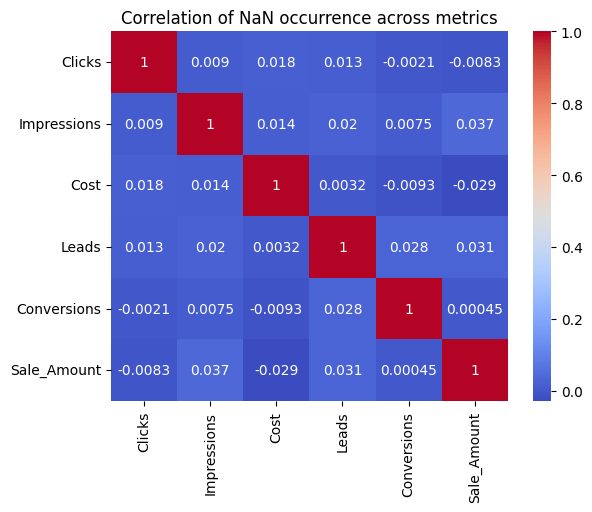

In [16]:
#do NaNs appear together?
nan_corr = df[cols_to_check].isna().astype(int).corr()
sns.heatmap(nan_corr, annot=True, cmap='coolwarm')
plt.title('Correlation of NaN occurrence across metrics')
plt.show()

           Clicks                           Impressions                  \
              min    max median        mean         min     max  median   
Ad_Date                                                                   
2024-11-01   81.0  199.0  144.0  143.791667      3002.0  5936.0  4370.0   
2024-11-02   82.0  194.0  128.0  133.148148      3007.0  5955.0  4635.0   
2024-11-03   80.0  196.0  135.0  140.644737      3057.0  5983.0  4813.0   
2024-11-04   82.0  199.0  154.5  147.925000      3006.0  5980.0  4537.0   
2024-11-05   80.0  198.0  146.0  143.730337      3029.0  5931.0  4510.5   
2024-11-06   82.0  197.0  155.0  147.352113      3024.0  5984.0  4279.0   
2024-11-07   80.0  195.0  131.0  132.192771      3024.0  5939.0  4603.0   
2024-11-08   80.0  199.0  138.0  141.200000      3017.0  5992.0  4593.0   
2024-11-09   81.0  199.0  141.5  139.435897      3149.0  5911.0  4418.0   
2024-11-10   83.0  199.0  138.0  137.233766      3008.0  5977.0  4035.0   
2024-11-11   81.0  199.0 

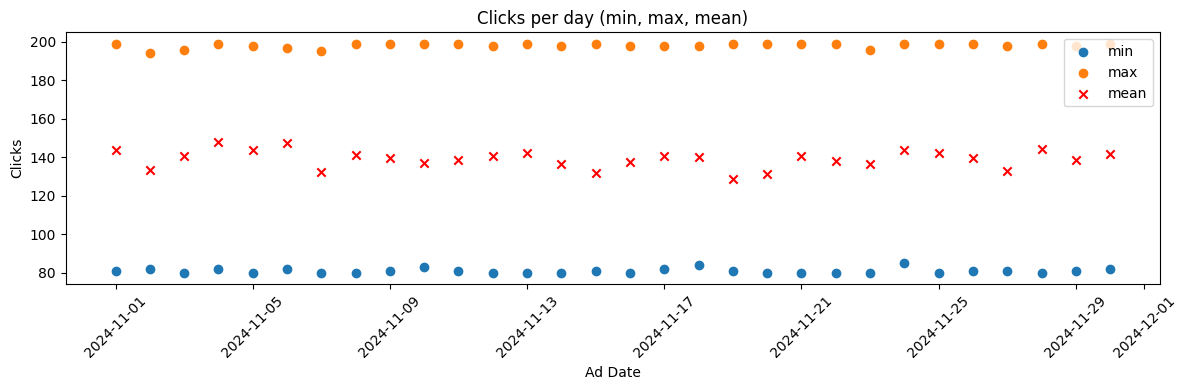

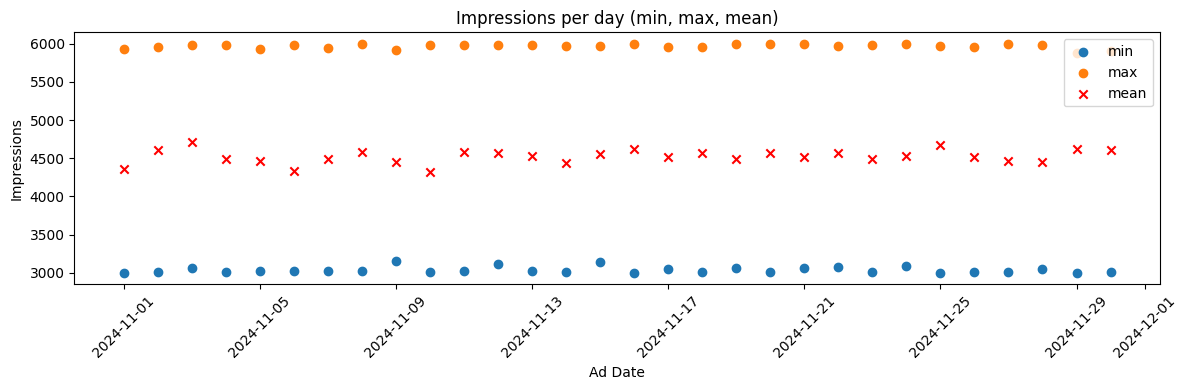

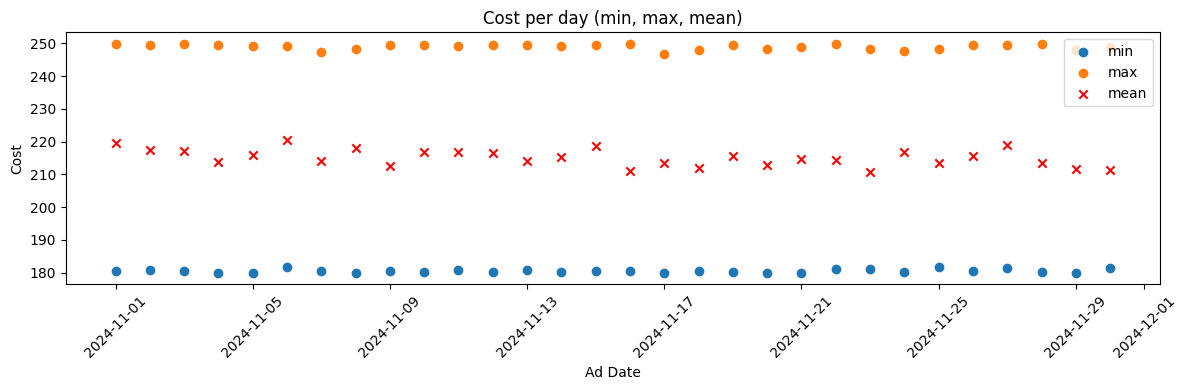

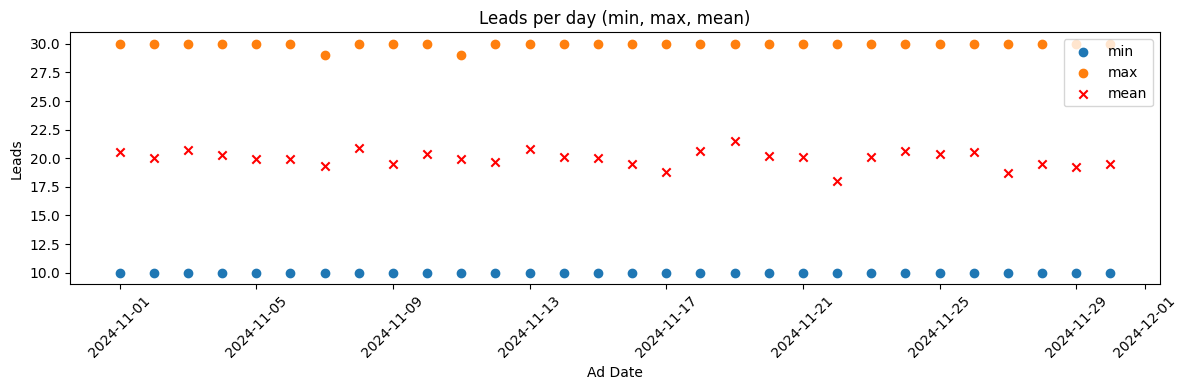

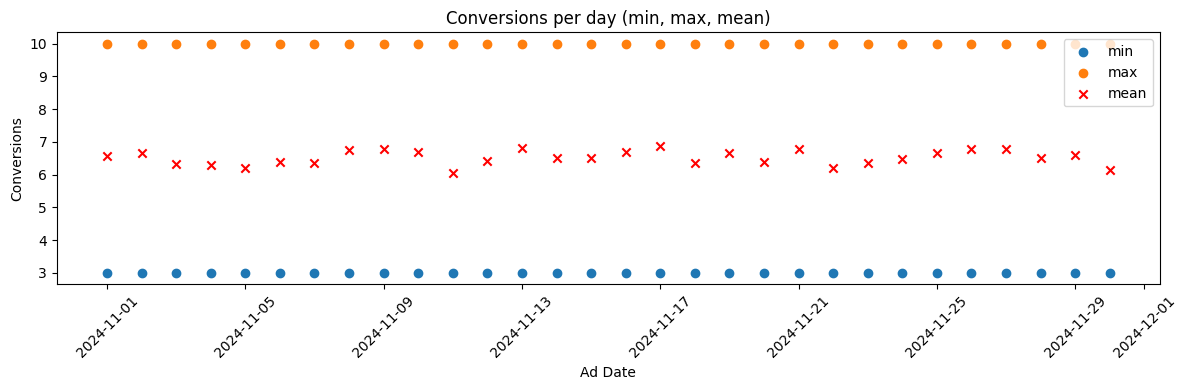

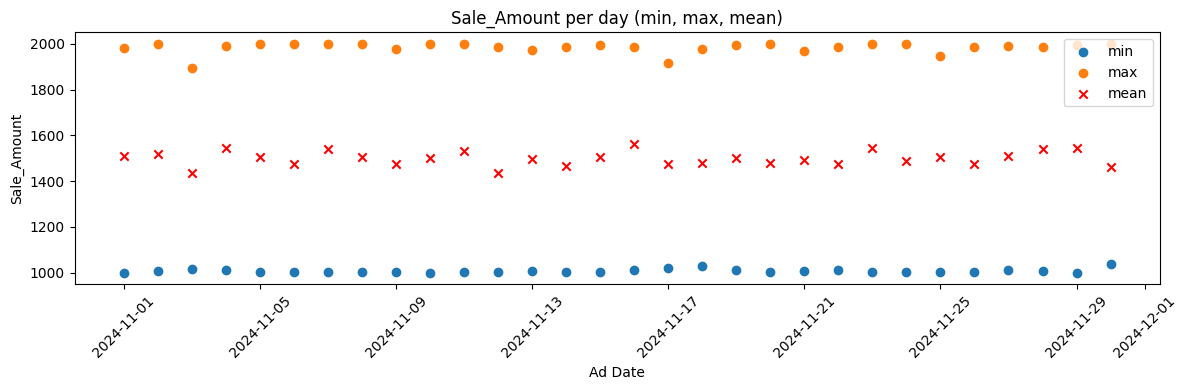

In [17]:
cols_to_check = ['Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Sale_Amount']

df['Ad_Date'] = pd.to_datetime(df['Ad_Date'])

daily_stats = df.groupby('Ad_Date')[cols_to_check].agg(['min', 'max', 'median', 'mean'])
print(daily_stats.head(20))

for col in cols_to_check:
    daily_stats[f'{col}_constant'] = daily_stats[(col, 'min')] == daily_stats[(col, 'max')]

for col in cols_to_check:
    plt.figure(figsize=(12,4))
    plt.scatter(daily_stats.index, daily_stats[(col,'min')], label='min')
    plt.scatter(daily_stats.index, daily_stats[(col,'max')], label='max')
    plt.scatter(daily_stats.index, daily_stats[(col,'mean')], label='mean', marker='x', color='red')
    plt.title(f'{col} per day (min, max, mean)')
    plt.ylabel(col)
    plt.xlabel('Ad Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [18]:
numeric_cols = ['Clicks', 'Impressions', 'Cost', 'Leads', 'Conversions', 'Sale_Amount']
df = df.dropna(subset=numeric_cols)

In [19]:
df['Conversion_Rate'] = df['Conversions'] / df['Clicks']
df['ROAS'] = df['Sale_Amount'] / df['Cost']

df = df.drop(columns=['Conversion Rate'])

df = df.reset_index(drop=True)

In [20]:
df.isnull().sum()

,0
Ad_ID,0
Campaign_Name,0
Clicks,0
Impressions,0
Cost,0
Leads,0
Conversions,0
Sale_Amount,0
Ad_Date,0
Location,0


In [21]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ad_ID            2125 non-null   object        
 1   Campaign_Name    2125 non-null   object        
 2   Clicks           2125 non-null   float64       
 3   Impressions      2125 non-null   float64       
 4   Cost             2125 non-null   float64       
 5   Leads            2125 non-null   float64       
 6   Conversions      2125 non-null   float64       
 7   Sale_Amount      2125 non-null   float64       
 8   Ad_Date          2125 non-null   datetime64[ns]
 9   Location         2125 non-null   object        
 10  Device           2125 non-null   object        
 11  Keyword          2125 non-null   object        
 12  Ad_Date_raw      2125 non-null   object        
 13  Conversion_Rate  2125 non-null   float64       
 14  ROAS             2125 non-null   float64

In [22]:
print(df.dtypes)

Ad_ID                      object
Campaign_Name              object
Clicks                    float64
Impressions               float64
Cost                      float64
Leads                     float64
Conversions               float64
Sale_Amount               float64
Ad_Date            datetime64[ns]
Location                   object
Device                     object
Keyword                    object
Ad_Date_raw                object
Conversion_Rate           float64
ROAS                      float64
dtype: object


In [23]:
df['Campaign_Name'].unique()

array(['Data Analytcis Course', 'Data Anlytics Corse',
       'Data Analytics Corse', 'DataAnalyticsCourse'], dtype=object)

In [24]:
df['Campaign_Name'] = df['Campaign_Name'].str.strip().str.lower()

campaign_mapping = {
    'data analytcis course': 'data analytics course',
    'data anlytics corse': 'data analytics course',
    'data analytics corse': 'data analytics course',
    'dataanalyticscourse': 'data analytics course'
}

df['Campaign_Name'] = df['Campaign_Name'].replace(campaign_mapping)

print(df['Campaign_Name'].unique())

['data analytics course']


In [25]:
df['Location'].unique()

array(['hyderabad', 'HYDERABAD', 'hydrebad', 'Hyderbad'], dtype=object)

In [26]:
df['Location'] = df['Location'].str.strip().str.lower()

location_mapping = {
    'hydrebad': 'hyderabad',
    'hyderbad': 'hyderabad'
}

df['Location'] = df['Location'].replace(location_mapping)

print(df['Location'].unique())

['hyderabad']


In [27]:
df['Device'].unique()

array(['Tablet', 'Mobile', 'Desktop', 'desktop', 'MOBILE', 'tablet',
       'mobile', 'TABLET', 'DESKTOP'], dtype=object)

In [28]:
df['Device'] = df['Device'].str.strip().str.lower()

print(df['Device'].unique())

['tablet' 'mobile' 'desktop']


In [29]:
df['Keyword'].unique()

array(['learn data analytics', 'data analytics course',
       'data anaytics training', 'data analitics online',
       'online data analytic', 'analytics for data'], dtype=object)

In [30]:
df['Keyword'] = df['Keyword'].str.strip().str.lower()

keyword_mapping = {
    'data anaytics training': 'data analytics training',
    'data analitics online': 'data analytics online',
    'online data analytic': 'data analytics online',
}

df['Keyword'] = df['Keyword'].replace(keyword_mapping)

print(df['Keyword'].unique())

['learn data analytics' 'data analytics course' 'data analytics training'
 'data analytics online' 'analytics for data']


In [31]:
df.head()

,Ad_ID,Campaign_Name,Clicks,Impressions,Cost,Leads,Conversions,Sale_Amount,Ad_Date,Location,Device,Keyword,Ad_Date_raw,Conversion_Rate,ROAS
0,A2041,data analytics course,164.0,4053.0,245.26,28.0,7.0,1384.0,2024-11-01,hyderabad,tablet,learn data analytics,2024-11-01,0.042683,5.642991
1,A1575,data analytics course,85.0,4747.0,224.35,26.0,5.0,1087.0,2024-11-01,hyderabad,tablet,data analytics course,01-11-2024,0.058824,4.845108
2,A3347,data analytics course,161.0,3160.0,229.71,17.0,3.0,1817.0,2024-11-01,hyderabad,mobile,data analytics training,2024-11-01,0.018634,7.909973
3,A1894,data analytics course,111.0,4026.0,229.01,13.0,3.0,1438.0,2024-11-01,hyderabad,desktop,learn data analytics,2024-11-01,0.027027,6.279202
4,A3445,data analytics course,141.0,5031.0,189.92,23.0,5.0,1093.0,2024-11-01,hyderabad,desktop,data analytics online,2024/11/01,0.035461,5.755055


In [32]:
df['Cost_per_Conversion'] = df['Cost'] / df['Conversions']
df['Revenue_per_Click'] = df['Sale_Amount'] / df['Clicks']

In [33]:
daily_metrics = df.groupby('Ad_Date').agg({
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Cost': 'sum',
    'Leads': 'sum',
    'Conversions': 'sum',
    'Sale_Amount': 'sum'
})

daily_metrics['Conversion_Rate'] = daily_metrics['Conversions'] / daily_metrics['Clicks']
daily_metrics['ROAS'] = daily_metrics['Sale_Amount'] / daily_metrics['Cost']


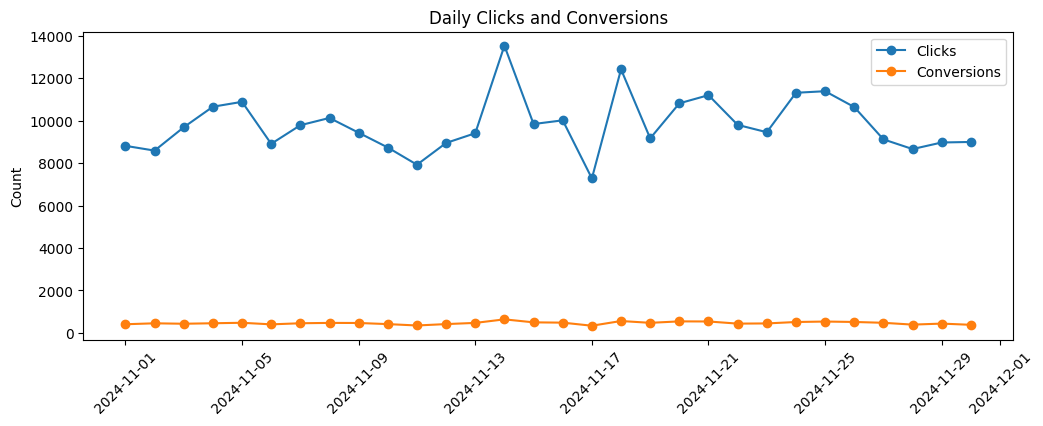

In [34]:
plt.figure(figsize=(12,4))
plt.plot(daily_metrics.index, daily_metrics['Clicks'], marker='o', label='Clicks')
plt.plot(daily_metrics.index, daily_metrics['Conversions'], marker='o', label='Conversions')
plt.title('Daily Clicks and Conversions')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend()
plt.show()

<Figure size 1200x400 with 0 Axes>

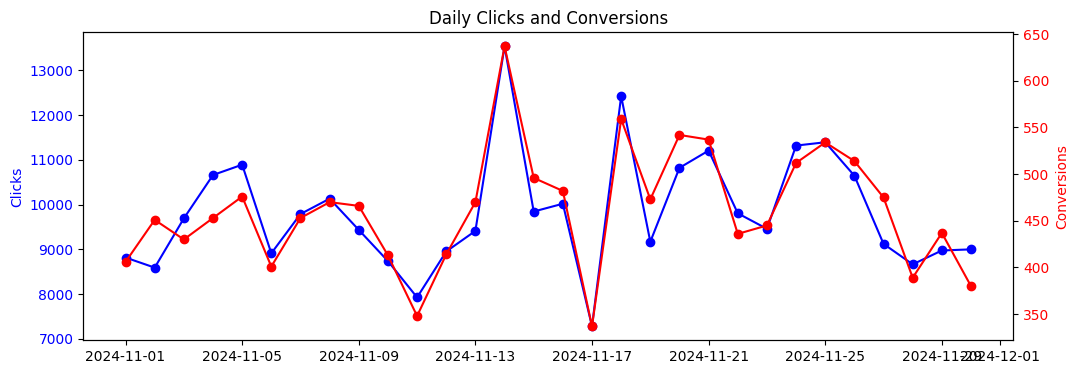

In [35]:
plt.figure(figsize=(12,4))
fig, ax1 = plt.subplots(figsize=(12,4))

ax1.plot(daily_metrics.index, daily_metrics['Clicks'], color='blue', marker='o', label='Clicks')
ax1.set_ylabel('Clicks', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(daily_metrics.index, daily_metrics['Conversions'], color='red', marker='o', label='Conversions')
ax2.set_ylabel('Conversions', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Daily Clicks and Conversions')
plt.xticks(rotation=45)
plt.show()

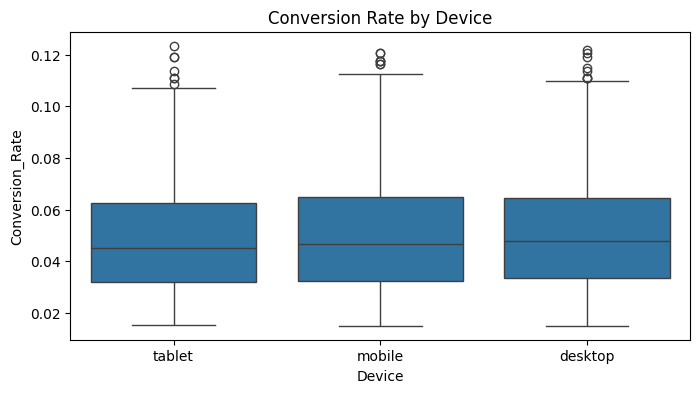

In [36]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='Device', y='Conversion_Rate')
plt.title('Conversion Rate by Device')
plt.show()

/tmp/ipython-input-3023460632.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


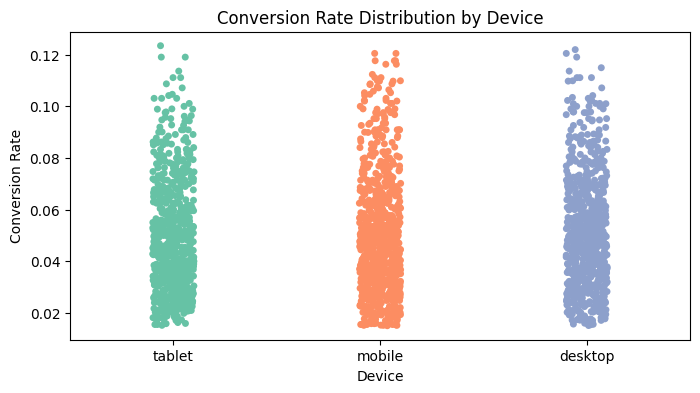

In [37]:
plt.figure(figsize=(8,4))
sns.stripplot(
    data=df,
    x='Device',
    y='Conversion_Rate',
    jitter=True,
    palette='Set2'
)
plt.title('Conversion Rate Distribution by Device')
plt.ylabel('Conversion Rate')
plt.show()

/tmp/ipython-input-3953990519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_avg.index, y=device_avg.values, palette='pastel')


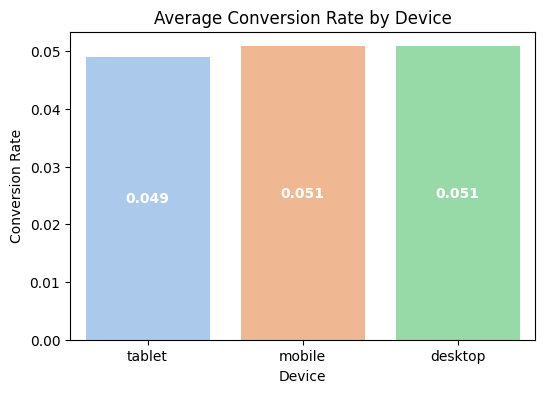

In [38]:
device_avg = df.groupby('Device')['Conversion_Rate'].mean().sort_values()

plt.figure(figsize=(6,4))
sns.barplot(x=device_avg.index, y=device_avg.values, palette='pastel')
plt.title('Average Conversion Rate by Device')
plt.ylabel('Conversion Rate')

for i, v in enumerate(device_avg.values):
    plt.text(i, v/2, f"{v:.3f}", ha='center', va='center', color='white', fontweight='bold')

plt.show()

/tmp/ipython-input-3669982612.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conv_rate, x="Device", y="Conversion_Rate", palette="Set2", ax=axes[0,1])
/tmp/ipython-input-3669982612.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=roas, x="Device", y="ROAS", palette="coolwarm", ax=axes[1,0])
/tmp/ipython-input-3669982612.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cpc, x="Device", y="Cost_per_Conversion", palette="Blues", ax=axes[1,1])


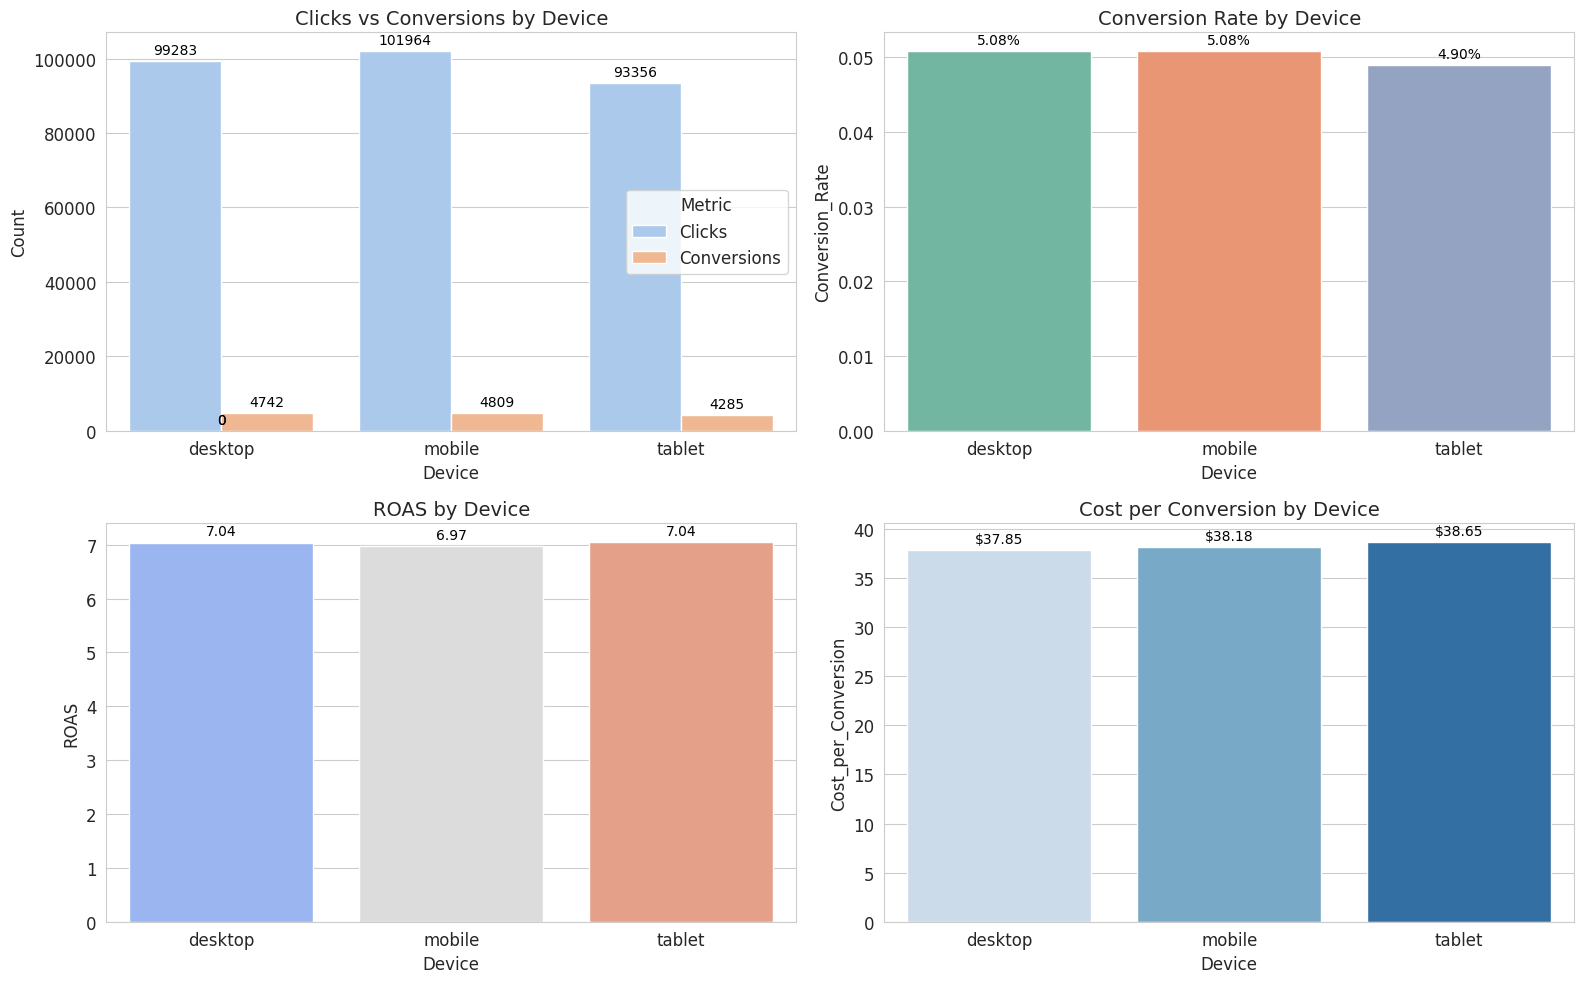

In [39]:
df["Cost_per_Conversion"] = df["Cost"] / df["Conversions"].replace(0, pd.NA)

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Clicks vs conversions by device
clicks_conv = df.groupby("Device")[["Clicks", "Conversions"]].sum().reset_index()
clicks_conv_melted = clicks_conv.melt(id_vars="Device", value_vars=["Clicks", "Conversions"],
                                      var_name="Metric", value_name="Count")
sns.barplot(data=clicks_conv_melted, x="Device", y="Count", hue="Metric", palette="pastel", ax=axes[0,0])
axes[0,0].set_title("Clicks vs Conversions by Device")
for p in axes[0,0].patches:
    height = p.get_height()
    axes[0,0].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3),
                        textcoords='offset points')

# Conversion rate by device
conv_rate = df.groupby("Device")["Conversion_Rate"].mean().reset_index()
sns.barplot(data=conv_rate, x="Device", y="Conversion_Rate", palette="Set2", ax=axes[0,1])
axes[0,1].set_title("Conversion Rate by Device")
for p in axes[0,1].patches:
    axes[0,1].annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3),
                        textcoords='offset points')

# ROAS by Device
roas = df.groupby("Device")["ROAS"].mean().reset_index()
sns.barplot(data=roas, x="Device", y="ROAS", palette="coolwarm", ax=axes[1,0])
axes[1,0].set_title("ROAS by Device")
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3),
                        textcoords='offset points')

# Cost per Conversion by Device
cpc = df.groupby("Device")["Cost_per_Conversion"].mean().reset_index()
sns.barplot(data=cpc, x="Device", y="Cost_per_Conversion", palette="Blues", ax=axes[1,1])
axes[1,1].set_title("Cost per Conversion by Device")
for p in axes[1,1].patches:
    axes[1,1].annotate(f'${p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0,3),
                        textcoords='offset points')

plt.tight_layout()
plt.show()

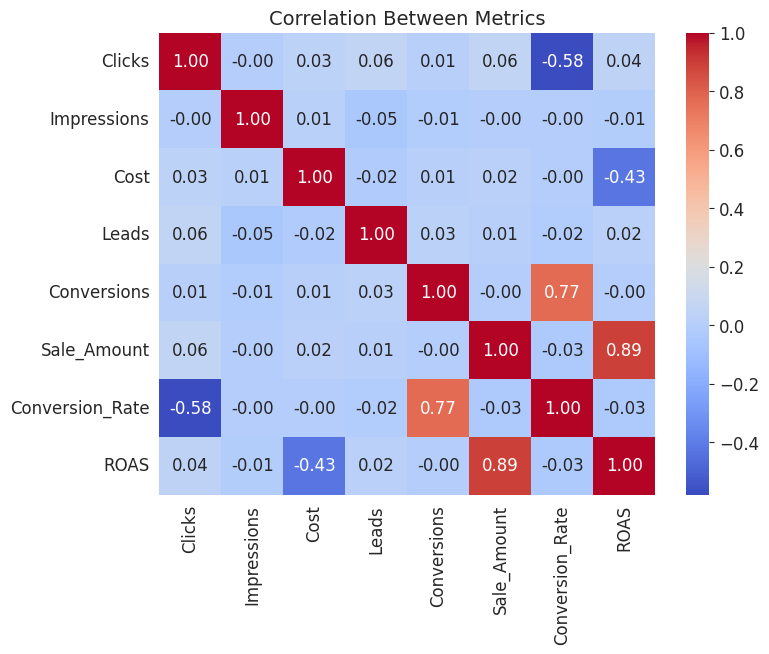

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols + ['Conversion_Rate', 'ROAS']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Between Metrics')
plt.show()

In [41]:
import plotly.graph_objects as go

# Agg by device
device_summary = df.groupby('Device').agg({
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Sale_Amount': 'sum'
}).reset_index()

# Normalize Sale_Amount
device_summary['Sale_Scaled'] = device_summary['Sale_Amount'] / device_summary['Sale_Amount'].max() * device_summary['Clicks'].max()

# Create funnel chart
fig = go.Figure()

for _, row in device_summary.iterrows():
    fig.add_trace(go.Funnel(
        name=row['Device'],
        y=['Clicks', 'Conversions', 'Sale Amount (scaled)'],
        x=[row['Clicks'], row['Conversions'], row['Sale_Scaled']],
        textinfo="value+percent initial"
    ))

fig.update_layout(title='Marketing Funnel by Device')
fig.show()

In [42]:
df['Keyword'].unique()

array(['learn data analytics', 'data analytics course',
       'data analytics training', 'data analytics online',
       'analytics for data'], dtype=object)

In [43]:
keyword_summary = df.groupby('Keyword').agg({
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Sale_Amount': 'sum',
    'Cost': 'sum'
}).reset_index()

keyword_summary['Conversion_Rate'] = keyword_summary['Conversions'] / keyword_summary['Clicks']
keyword_summary['ROAS'] = keyword_summary['Sale_Amount'] / keyword_summary['Cost']

keyword_summary

,Keyword,Clicks,Conversions,Sale_Amount,Cost,Conversion_Rate,ROAS
0,analytics for data,49169.0,2266.0,529973.0,76559.84,0.046086,6.922337
1,data analytics course,51281.0,2372.0,547052.0,76990.46,0.046255,7.105452
2,data analytics online,96507.0,4470.0,1030248.0,149734.25,0.046318,6.880510
3,data analytics training,46709.0,2265.0,503592.0,71941.76,0.048492,6.999996
4,learn data analytics,50937.0,2463.0,568866.0,81784.30,0.048354,6.955687


/tmp/ipython-input-4042261500.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




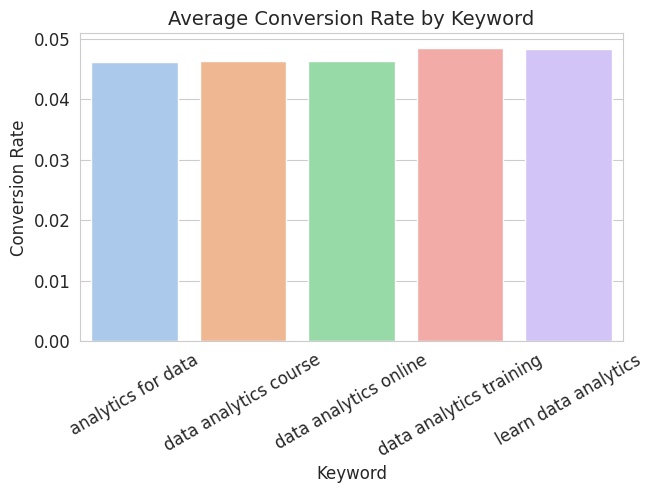

In [44]:
plt.figure(figsize=(7,4))
sns.barplot(x='Keyword', y='Conversion_Rate', data=keyword_summary, palette='pastel')
plt.title('Average Conversion Rate by Keyword')
plt.xticks(rotation=30)
plt.ylabel('Conversion Rate')
plt.show()

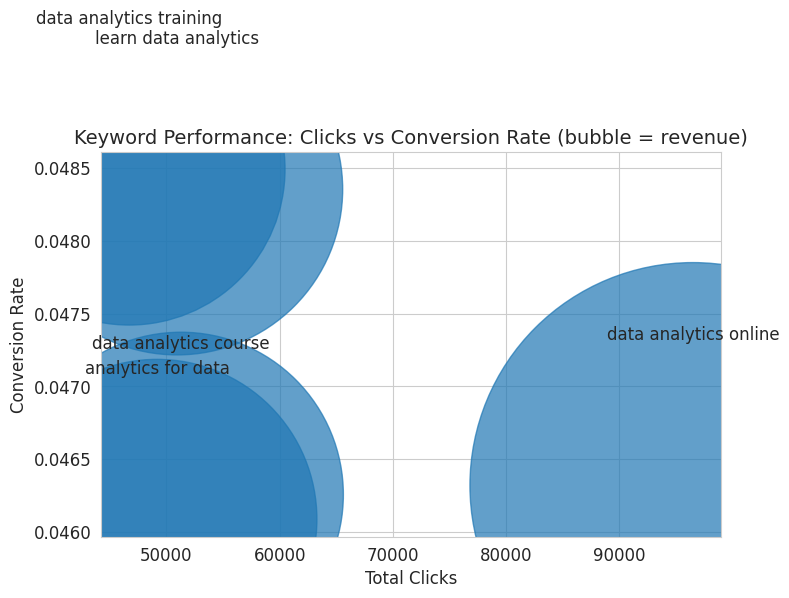

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(
    keyword_summary['Clicks'],
    keyword_summary['Conversion_Rate'],
    s=keyword_summary['Sale_Amount']/10,
    alpha=0.7
)
for i, row in keyword_summary.iterrows():
    plt.text(row['Clicks'], row['Conversion_Rate']+0.001, row['Keyword'], ha='center')

plt.xlabel('Total Clicks')
plt.ylabel('Conversion Rate')
plt.title('Keyword Performance: Clicks vs Conversion Rate (bubble = revenue)')
plt.show()

/tmp/ipython-input-2712499718.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2712499718.py:67: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2712499718.py:87: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




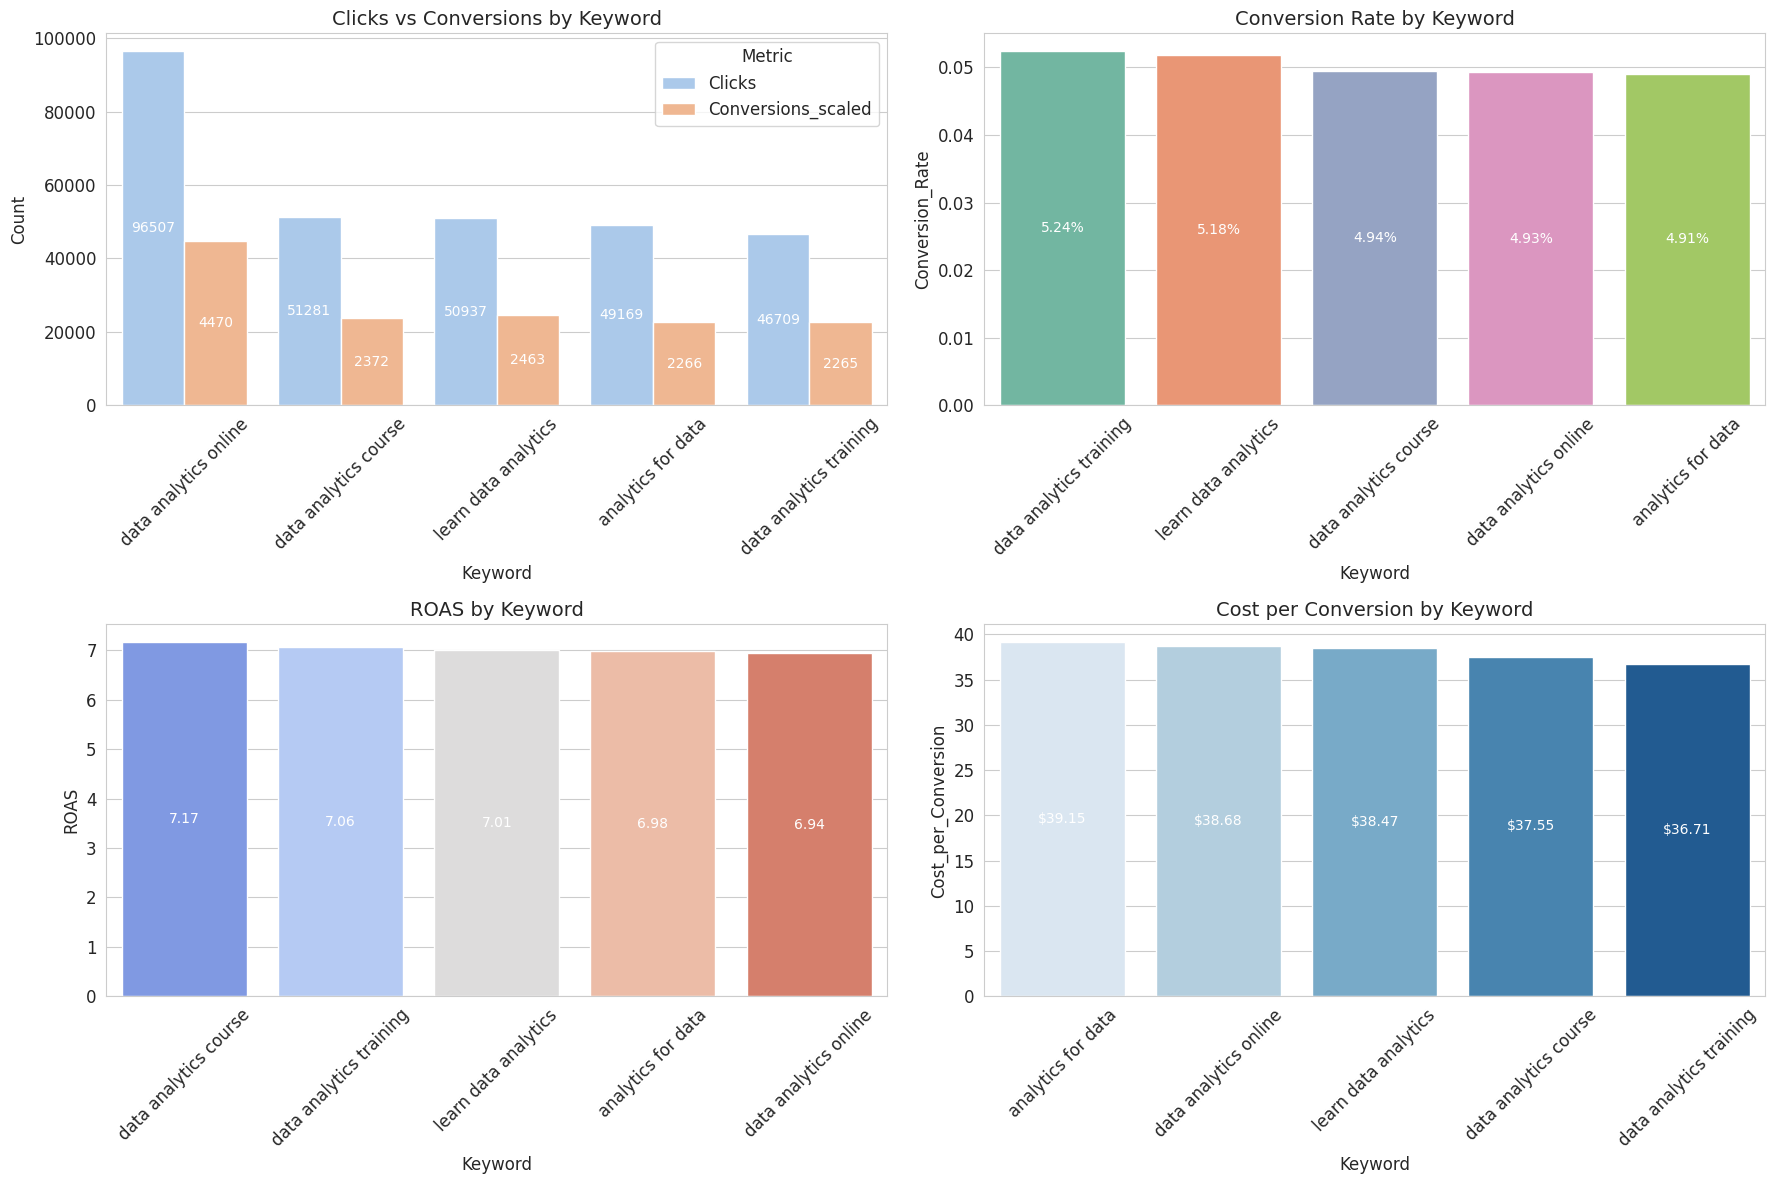

In [46]:
# Calculate Cost per Conversion for keywords
df["Cost_per_Conversion"] = df["Cost"] / df["Conversions"].replace(0, pd.NA)

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 14, 'axes.labelsize': 12})

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Clicks vs Conversions by Keyword (scaled)
scale_factor = 10
keyword_clicks_conv = df.groupby("Keyword")[["Clicks", "Conversions"]].sum().reset_index()
keyword_clicks_conv["Conversions_scaled"] = keyword_clicks_conv["Conversions"] * scale_factor
keyword_clicks_conv_melted = keyword_clicks_conv.melt(
    id_vars="Keyword",
    value_vars=["Clicks", "Conversions_scaled"],
    var_name="Metric",
    value_name="Count"
)

# Order by total clicks
order_kw = keyword_clicks_conv.groupby("Keyword")["Clicks"].sum().sort_values(ascending=False).index

sns.barplot(
    data=keyword_clicks_conv_melted,
    x="Keyword",
    y="Count",
    hue="Metric",
    palette="pastel",
    order=order_kw,
    ax=axes[0,0]
)
axes[0,0].set_title("Clicks vs Conversions by Keyword")
axes[0,0].tick_params(axis='x', rotation=45)

# Annotate
for p, metric in zip(axes[0,0].patches, keyword_clicks_conv_melted["Metric"]):
    value = int(p.get_height() / scale_factor) if metric == "Conversions_scaled" else int(p.get_height())
    axes[0,0].annotate(
        value,
        (p.get_x() + p.get_width() / 2., p.get_height()/2),
        ha='center', va='center', fontsize=10, color='white'
    )

# Conversion rate by keyword
conv_rate_kw = df.groupby("Keyword")["Conversion_Rate"].mean().reset_index()
conv_rate_kw = conv_rate_kw.sort_values("Conversion_Rate", ascending=False)
sns.barplot(
    data=conv_rate_kw,
    x="Keyword",
    y="Conversion_Rate",
    palette="Set2",
    ax=axes[0,1],
    order=conv_rate_kw["Keyword"]
)
axes[0,1].set_title("Conversion Rate by Keyword")
axes[0,1].tick_params(axis='x', rotation=45)
for p in axes[0,1].patches:
    axes[0,1].annotate(
        f'{p.get_height():.2%}',
        (p.get_x() + p.get_width() / 2., p.get_height()/2),
        ha='center', va='center', fontsize=10, color='white'
    )

# ROAS by keyword
roas_kw = df.groupby("Keyword")["ROAS"].mean().reset_index()
roas_kw = roas_kw.sort_values("ROAS", ascending=False)
sns.barplot(
    data=roas_kw,
    x="Keyword",
    y="ROAS",
    palette="coolwarm",
    ax=axes[1,0],
    order=roas_kw["Keyword"]
)
axes[1,0].set_title("ROAS by Keyword")
axes[1,0].tick_params(axis='x', rotation=45)
for p in axes[1,0].patches:
    axes[1,0].annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()/2),
        ha='center', va='center', fontsize=10, color='white'
    )

# Cost per Conversion by keyword
cpc_kw = df.groupby("Keyword")["Cost_per_Conversion"].mean().reset_index()
cpc_kw = cpc_kw.sort_values("Cost_per_Conversion", ascending=False)
sns.barplot(
    data=cpc_kw,
    x="Keyword",
    y="Cost_per_Conversion",
    palette="Blues",
    ax=axes[1,1],
    order=cpc_kw["Keyword"]
)
axes[1,1].set_title("Cost per Conversion by Keyword")
axes[1,1].tick_params(axis='x', rotation=45)
for p in axes[1,1].patches:
    axes[1,1].annotate(
        f'${p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()/2),
        ha='center', va='center', fontsize=10, color='white'
    )

plt.tight_layout()
plt.show()

In [47]:
keyword_summary = df.groupby('Keyword').agg({
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Sale_Amount': 'sum'
}).reset_index()

# Scale Sale_Amount to clicks max
keyword_summary['Sale_Scaled'] = keyword_summary['Sale_Amount'] / keyword_summary['Sale_Amount'].max() * keyword_summary['Clicks'].max()

fig = go.Figure()

for _, row in keyword_summary.iterrows():
    fig.add_trace(go.Funnel(
        name=row['Keyword'],
        y=['Clicks', 'Conversions', 'Sale Amount (scaled)'],
        x=[row['Clicks'], row['Conversions'], row['Sale_Scaled']],
        textinfo="value+percent initial"
    ))

fig.update_layout(title='Marketing Funnel by Keyword')
fig.show()

In [48]:
df['Ad_Date'] = pd.to_datetime(df['Ad_Date'])

df['Day_of_Week'] = df['Ad_Date'].dt.day_name()

daily_summary = df.groupby('Day_of_Week').agg({
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Sale_Amount': 'sum',
    'Cost': 'sum'
}).reset_index()

# Derived metrics
daily_summary['Conversion_Rate'] = daily_summary['Conversions'] / daily_summary['Clicks']
daily_summary['ROAS'] = daily_summary['Sale_Amount'] / daily_summary['Cost']

# Sort by weekday
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_summary['Day_of_Week'] = pd.Categorical(daily_summary['Day_of_Week'], categories=weekday_order, ordered=True)
daily_summary = daily_summary.sort_values('Day_of_Week')
daily_summary

,Day_of_Week,Clicks,Conversions,Sale_Amount,Cost,Conversion_Rate,ROAS
1,Monday,42398.0,1894.0,450729.0,63862.47,0.044672,7.057807
5,Tuesday,39655.0,1877.0,430071.0,62355.19,0.047333,6.897116
6,Wednesday,38263.0,1888.0,420989.0,60973.30,0.049343,6.904481
4,Thursday,43192.0,2016.0,463135.0,66172.15,0.046675,6.998941
0,Friday,47569.0,2245.0,516341.0,74731.20,0.047195,6.909310
2,Saturday,46500.0,2224.0,512852.0,72419.80,0.047828,7.081654
3,Sunday,37026.0,1692.0,385614.0,56496.50,0.045698,6.825449


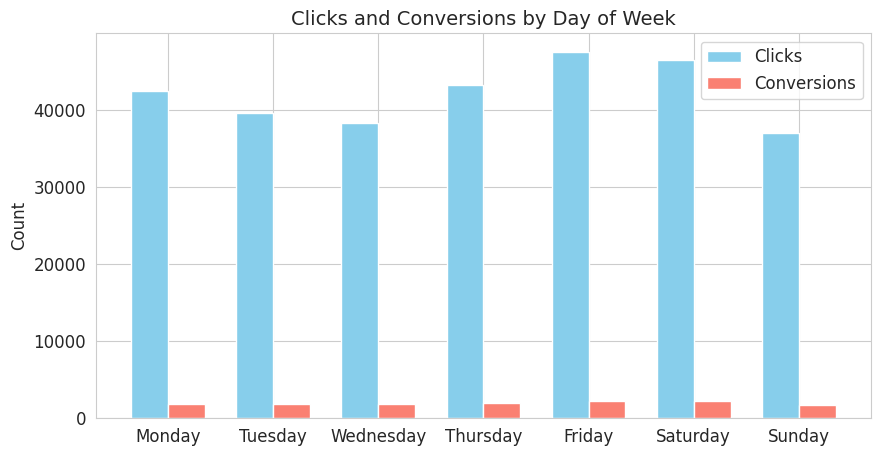

In [49]:
import numpy as np

x = np.arange(len(daily_summary))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/2, daily_summary['Clicks'], width, label='Clicks', color='skyblue')
ax.bar(x + width/2, daily_summary['Conversions'], width, label='Conversions', color='salmon')

ax.set_xticks(x)
ax.set_xticklabels(daily_summary['Day_of_Week'])
ax.set_ylabel('Count')
ax.set_title('Clicks and Conversions by Day of Week')
ax.legend()
plt.show()

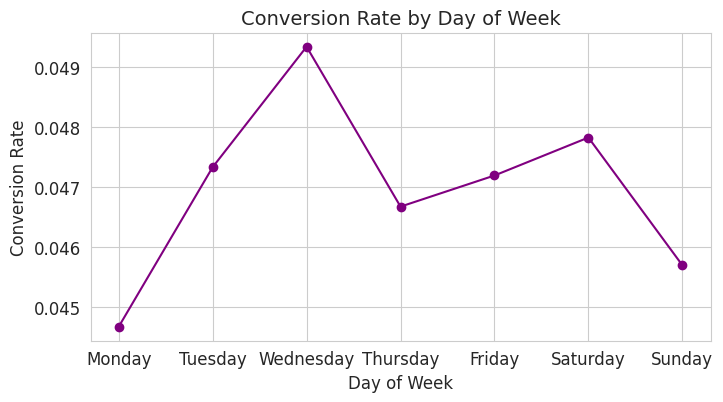

In [50]:
plt.figure(figsize=(8,4))
plt.plot(daily_summary['Day_of_Week'], daily_summary['Conversion_Rate'], marker='o', color='purple')
plt.title('Conversion Rate by Day of Week')
plt.ylabel('Conversion Rate')
plt.xlabel('Day of Week')
plt.grid(True)
plt.show()

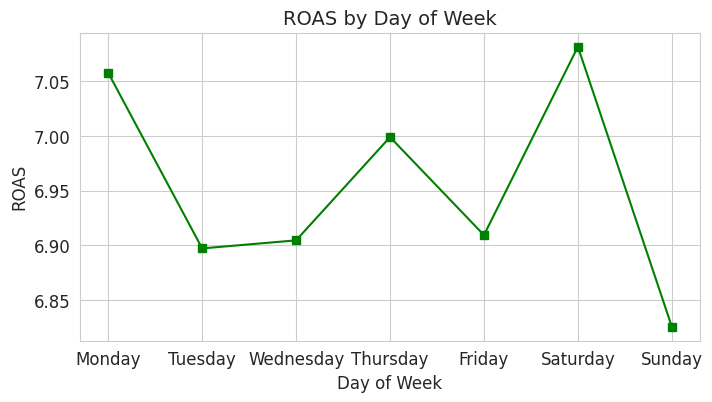

In [51]:
plt.figure(figsize=(8,4))
plt.plot(daily_summary['Day_of_Week'], daily_summary['ROAS'], marker='s', color='green')
plt.title('ROAS by Day of Week')
plt.ylabel('ROAS')
plt.xlabel('Day of Week')
plt.grid(True)
plt.show()

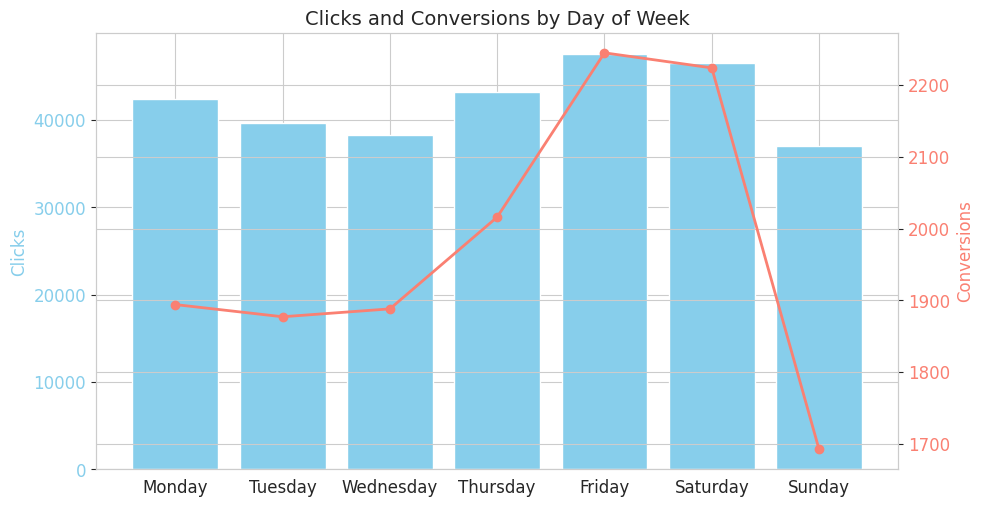

In [52]:
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'skyblue'
ax1.bar(daily_summary['Day_of_Week'], daily_summary['Clicks'], color=color, label='Clicks')
ax1.set_ylabel('Clicks', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'salmon'
ax2.plot(daily_summary['Day_of_Week'], daily_summary['Conversions'], color=color, marker='o', linewidth=2, label='Conversions')
ax2.set_ylabel('Conversions', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Clicks and Conversions by Day of Week')
plt.show()

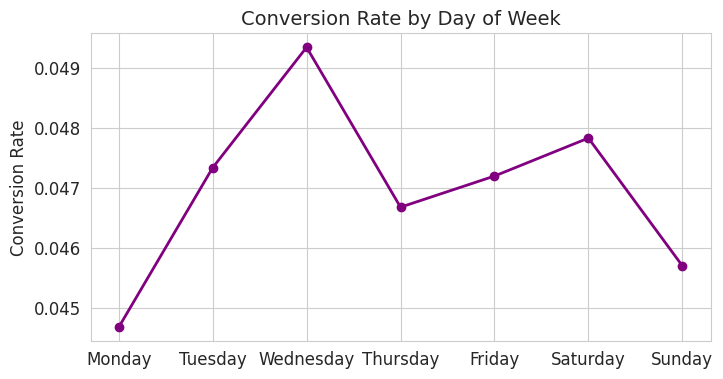

In [53]:
plt.figure(figsize=(8,4))
plt.plot(daily_summary['Day_of_Week'], daily_summary['Conversion_Rate'], marker='o', color='purple', linewidth=2)
plt.title('Conversion Rate by Day of Week')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()

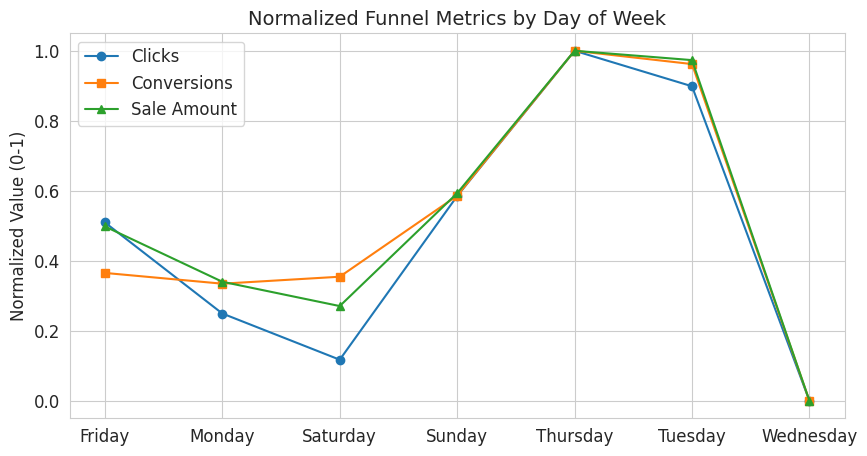

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

funnel_metrics = daily_summary[['Clicks', 'Conversions', 'Sale_Amount']]
funnel_scaled = pd.DataFrame(scaler.fit_transform(funnel_metrics), columns=funnel_metrics.columns)
funnel_scaled['Day_of_Week'] = daily_summary['Day_of_Week']

plt.figure(figsize=(10,5))
plt.plot(funnel_scaled['Day_of_Week'], funnel_scaled['Clicks'], marker='o', label='Clicks')
plt.plot(funnel_scaled['Day_of_Week'], funnel_scaled['Conversions'], marker='s', label='Conversions')
plt.plot(funnel_scaled['Day_of_Week'], funnel_scaled['Sale_Amount'], marker='^', label='Sale Amount')
plt.title('Normalized Funnel Metrics by Day of Week')
plt.ylabel('Normalized Value (0-1)')
plt.legend()
plt.grid(True)
plt.show()

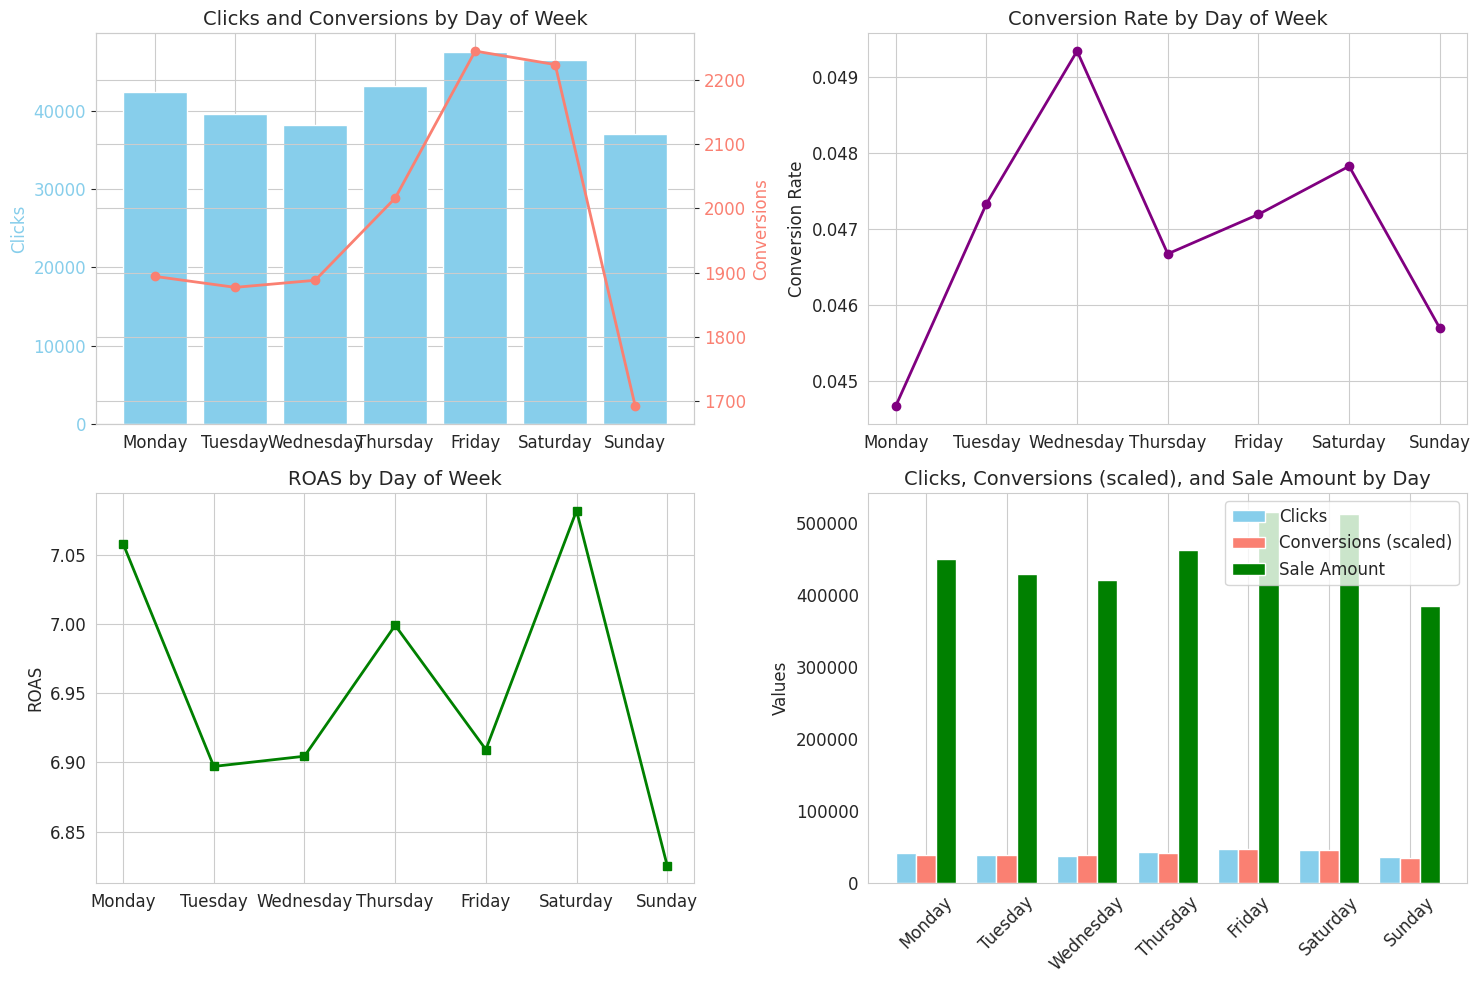

In [55]:
conversion_factor = daily_summary['Clicks'].max() / daily_summary['Conversions'].max()
scaled_conversions = daily_summary['Conversions'] * conversion_factor

fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Clicks and Conversions
ax1 = axs[0,0]
ax1.bar(daily_summary['Day_of_Week'], daily_summary['Clicks'], color='skyblue', label='Clicks')
ax1.set_ylabel('Clicks', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(daily_summary['Day_of_Week'], daily_summary['Conversions'], color='salmon', marker='o', linewidth=2, label='Conversions')
ax2.set_ylabel('Conversions', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

ax1.set_title('Clicks and Conversions by Day of Week')

# Conversion Rate
axs[0,1].plot(daily_summary['Day_of_Week'], daily_summary['Conversion_Rate'], marker='o', color='purple', linewidth=2)
axs[0,1].set_title('Conversion Rate by Day of Week')
axs[0,1].set_ylabel('Conversion Rate')
axs[0,1].grid(True)

# ROAS
axs[1,0].plot(daily_summary['Day_of_Week'], daily_summary['ROAS'], marker='s', color='green', linewidth=2)
axs[1,0].set_title('ROAS by Day of Week')
axs[1,0].set_ylabel('ROAS')
axs[1,0].grid(True)

# Grouped bar chart (scaled)
x = np.arange(len(daily_summary))
width = 0.25

axs[1,1].bar(x - width, daily_summary['Clicks'], width, label='Clicks', color='skyblue')
axs[1,1].bar(x, scaled_conversions, width, label='Conversions (scaled)', color='salmon')
axs[1,1].bar(x + width, daily_summary['Sale_Amount'], width, label='Sale Amount', color='green')

axs[1,1].set_xticks(x)
axs[1,1].set_xticklabels(daily_summary['Day_of_Week'], rotation=45)
axs[1,1].set_ylabel('Values')
axs[1,1].set_title('Clicks, Conversions (scaled), and Sale Amount by Day')
axs[1,1].legend()
axs[1,1].grid(axis='y')

plt.tight_layout()
plt.show()

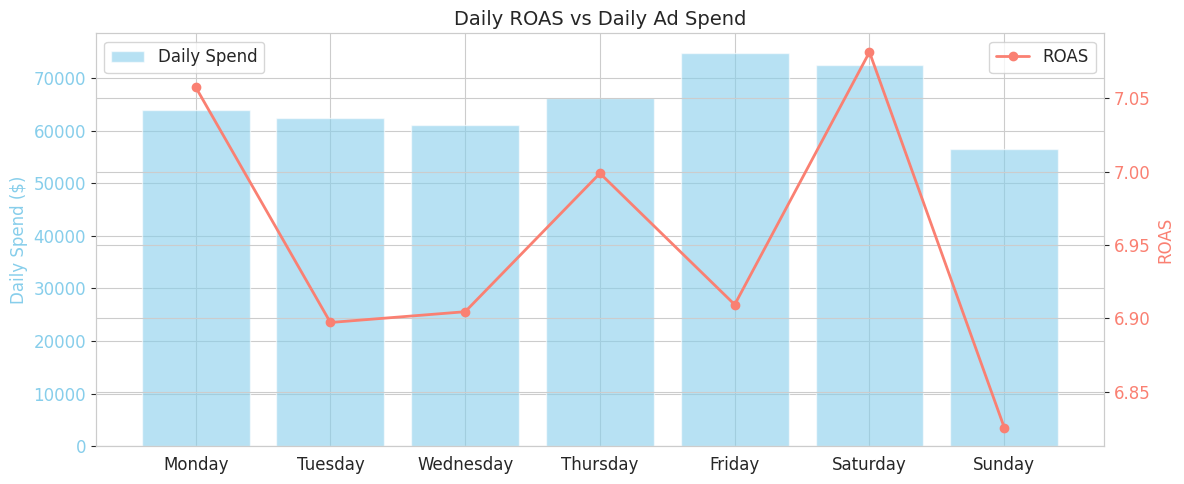

In [56]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.bar(daily_summary['Day_of_Week'], daily_summary['Cost'], color='skyblue', alpha=0.6, label='Daily Spend')
ax1.set_ylabel('Daily Spend ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(daily_summary['Day_of_Week'], daily_summary['ROAS'], color='salmon', marker='o', linewidth=2, label='ROAS')
ax2.set_ylabel('ROAS', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

ax1.set_title('Daily ROAS vs Daily Ad Spend')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

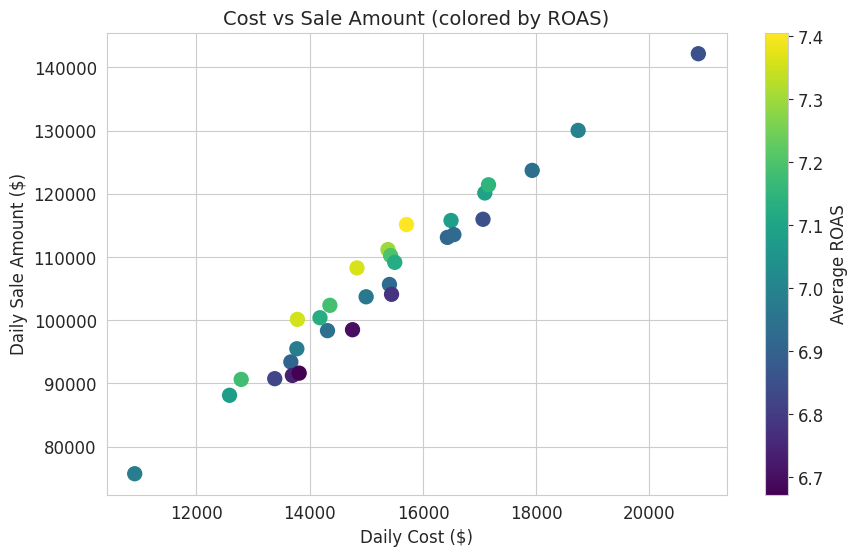

In [57]:
daily_summary = df.groupby('Ad_Date').agg({'Cost':'sum', 'Sale_Amount':'sum', 'ROAS':'mean'}).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(daily_summary['Cost'], daily_summary['Sale_Amount'], c=daily_summary['ROAS'], cmap='viridis', s=100)
plt.colorbar(label='Average ROAS')
plt.xlabel('Daily Cost ($)')
plt.ylabel('Daily Sale Amount ($)')
plt.title('Cost vs Sale Amount (colored by ROAS)')
plt.grid(True)
plt.show()

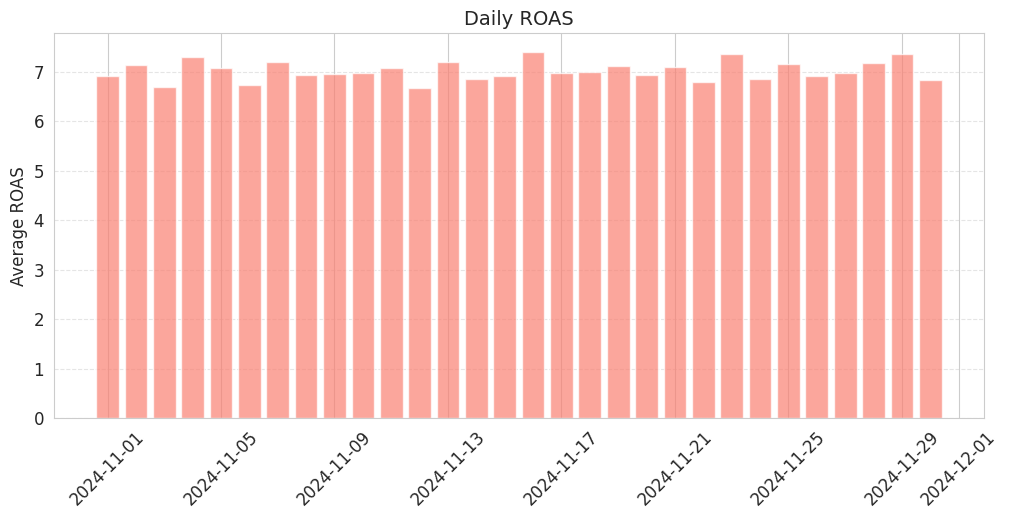

In [58]:
plt.figure(figsize=(12,5))
plt.bar(daily_summary['Ad_Date'], daily_summary['ROAS'], color='salmon', alpha=0.7)
plt.xticks(rotation=45)
plt.ylabel('Average ROAS')
plt.title('Daily ROAS')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()